In [40]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
from langchain.vectorstores import FAISS
import numpy as np

In [41]:
class FaissKMeans:
  # https://github.com/facebookresearch/faiss/issues/2492
    def __init__(self, n_clusters=8, n_init=10, max_iter=300):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.kmeans = None
        self.cluster_centers_ = None
        self.inertia_ = None
        self.labels_=None
    def fit(self, data_dict):
        # X = np.array(data_dict['embeddings']).astype('float32')
        X = data_dict.astype('float32')
        faiss.normalize_L2(X)
        self.kmeans = faiss.Kmeans(d=X.shape[1],
                                 k=self.n_clusters,
                                 niter=self.max_iter,
                                 nredo=self.n_init,
                                 gpu = True,
                                 verbose = True)
                                 #index = quantizer)
        self.kmeans.train(X)
        self.cluster_centers_ = self.kmeans.centroids
        self.inertia_ = self.kmeans.obj[-1]
        self.labels_ = self.predict(X)
  
    def predict(self, data_dict):
        X = data_dict.astype('float32')
        labels = [float(element) for element in self.kmeans.index.search(X, 1)[1]]
        return labels
  

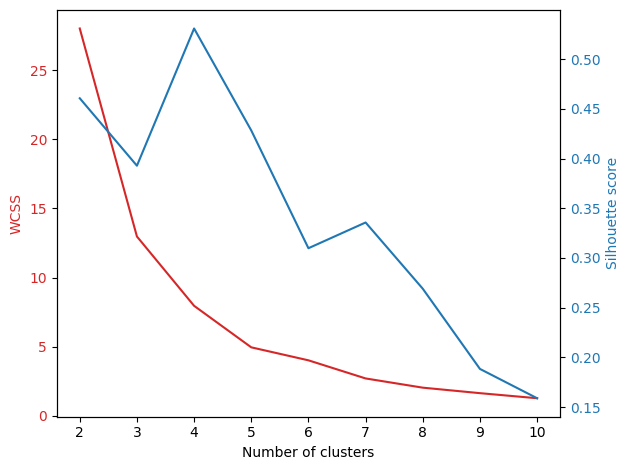

In [48]:


X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
# X = FAISS.load_local('faiss_db')
wcss = []
silhouette_scores = []
labels = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i,  max_iter=300, n_init=10, random_state=0)
    kmeans = FaissKMeans(n_clusters=i, max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    labels.append(kmeans.labels_)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('WCSS', color=color)
ax1.plot(range(2, 11), wcss, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Silhouette score', color=color)
ax2.plot(range(2, 11), silhouette_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

<Axes: xlabel='0', ylabel='1'>

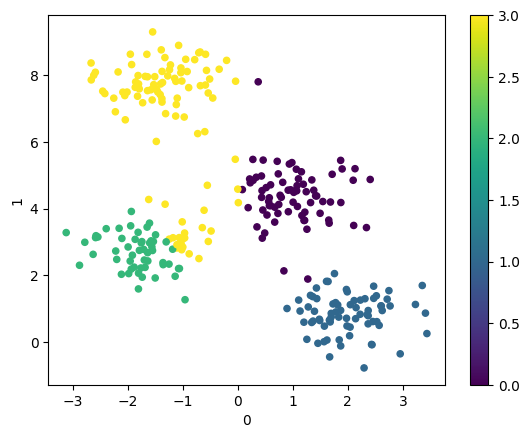

In [49]:
df = pd.DataFrame(X)
df['color'] = labels[2]

df.plot.scatter(0,1, c=df.color,  colormap='viridis')